
# 05. Redes neuronales en Keras
[**Python Deep Learning** Introducción práctica con Keras y TensorFlow 2. Jordi Torres. Editorial Marcombo ISBN: 9788426728289 ](https://www.marcombo.com/python-deep-learning-9788426728289/)


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


TensorFlow 2.x selected.
2.1.0-rc1


## 5.1. Precarga de los datos en Keras

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


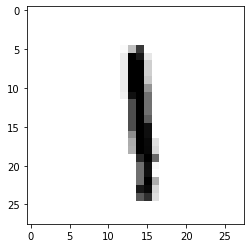

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)



In [4]:
print(y_train[8])

1


In [5]:
print(x_train.ndim)

3


In [6]:
print(x_train.shape)

(60000, 28, 28)


In [7]:
print(x_train.dtype) 

uint8


In [8]:
my_slice = x_train [1:100:,:]
print(my_slice.shape)

(99, 28, 28)


In [9]:
my_slice = x_train [1:100,0:28, 0:28]
print(my_slice.shape)

(99, 28, 28)


In [10]:
my_slice = x_train [:, 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


In [11]:
my_slice = x_train [:, 7:-7, 7:-7]
print(my_slice.shape)


(60000, 14, 14)


## 5.2. Preprocesado de datos de entrada en una red neuronal

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [14]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [15]:
from keras.utils import to_categorical


Using TensorFlow backend.


In [16]:
print(y_test[0])

7


In [17]:
print(y_train[0])

5


In [18]:
print(y_train.shape)

(60000,)


In [19]:
print(x_test.shape)

(10000, 784)


In [20]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


print(y_test[0])


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [21]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [22]:
print(y_train.shape)

(60000, 10)


In [23]:
print(y_test.shape)

(10000, 10)


## 5.3. Definición del modelo

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


## 5.4. Configuración del proceso de aprendizaje

In [0]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])


## 5.5. Entrenamiento del modelo

In [27]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 104us/sample - loss: 1.8962 - accuracy: 0.4779
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 1.3388 - accuracy: 0.6852
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 1.0179 - accuracy: 0.7689
Epoch 4/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.8263 - accuracy: 0.8186
Epoch 5/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.7059 - accuracy: 0.8441


## 5.6. Evaluación del modelo

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.6459 - accuracy: 0.8576


In [29]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8576


In [0]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

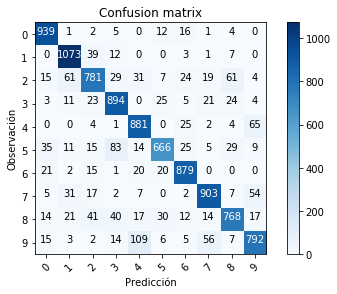

In [31]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

## 5.7. Generación de predicciones

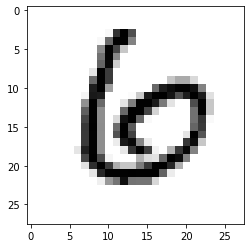

In [32]:
x_test_old = x_test.reshape(10000, 28,28)
plt.imshow(x_test_old[11], cmap=plt.cm.binary)

In [0]:
predictions = model.predict(x_test)

In [34]:
np.argmax(predictions[11])

6

In [35]:
print(predictions[11])

[0.10931358 0.02819096 0.16549434 0.02959464 0.03058403 0.07047171
 0.4435051  0.0026325  0.10110602 0.01910711]


In [36]:
np.sum(predictions[11])

1.0

## 5.8. Datos Fashion-MNIST

In [37]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [40]:
print("train_images.shape:",train_images.shape)
print("len(train_labels:",len(train_labels))
print("test_images.shape:",test_images.shape)
print("len(test_labels):",len(test_labels))

train_images.shape: (60000, 28, 28)
len(train_labels: 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


In [41]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

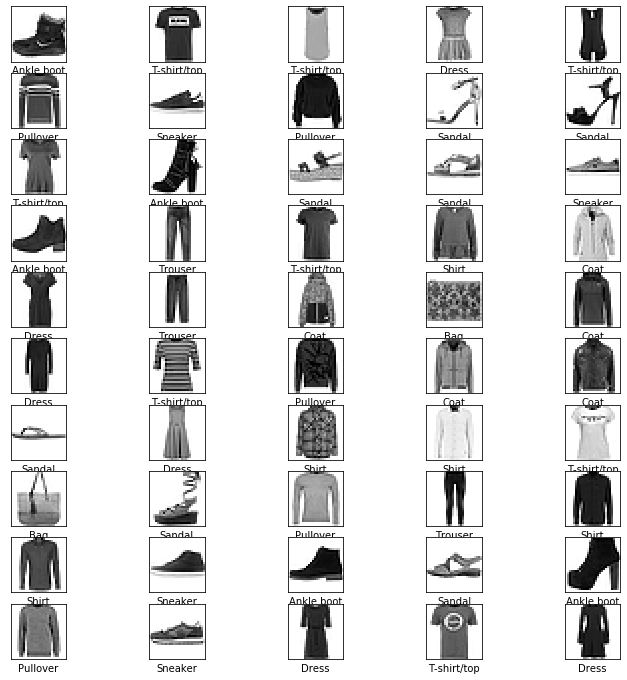

In [42]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))


In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 1.6099 - accuracy: 0.5114
Epoch 2/5
60000/60000 [==============================] - 4s 63us/sample - loss: 1.1850 - accuracy: 0.6212
Epoch 3/5
60000/60000 [==============================] - 4s 65us/sample - loss: 1.0436 - accuracy: 0.6446
Epoch 4/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.9571 - accuracy: 0.6557
Epoch 5/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.9439 - accuracy: 0.6565


In [47]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.8889 - accuracy: 0.6633


In [48]:
print('Test accuracy:', test_acc)

Test accuracy: 0.6633


In [0]:
predictions = model.predict(test_images)

In [50]:
predictions[5]

array([8.5519841e-03, 8.7904418e-01, 2.2360822e-02, 3.6623951e-02,
       2.9362656e-02, 4.3734553e-04, 1.9460022e-02, 1.1925171e-03,
       2.5841249e-03, 3.8242192e-04], dtype=float32)

In [51]:
np.argmax(predictions[5])

1

In [52]:
test_labels[5]

1

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

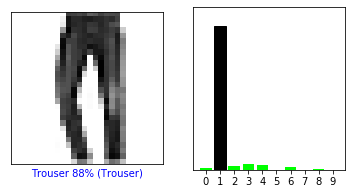

In [54]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

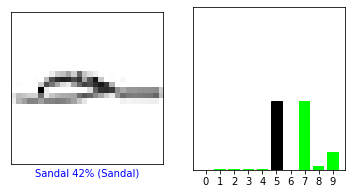

In [55]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

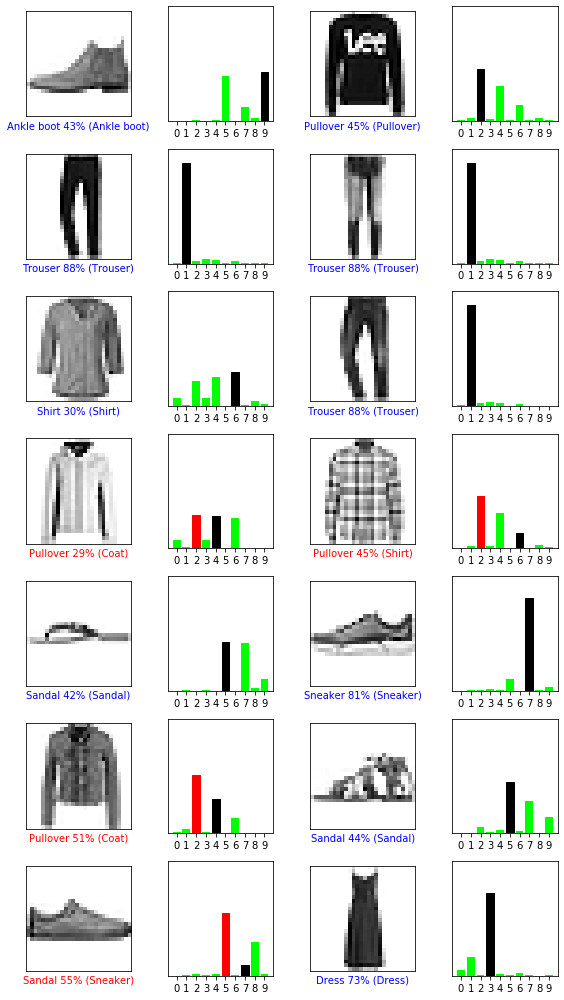

In [56]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



In [57]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 1.4881 - accuracy: 0.4728
Epoch 2/5
60000/60000 [==============================] - 4s 66us/sample - loss: 1.1133 - accuracy: 0.6037
Epoch 3/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.9584 - accuracy: 0.6604
Epoch 4/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.8975 - accuracy: 0.6880
Epoch 5/5
10000/10000 [==============================] - 1s 64us/sample - loss: 0.8040 - accuracy: 0.7183

Test accuracy: 0.7183


In [58]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.9088 - accuracy: 0.6913
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.7493 - accuracy: 0.7266
Epoch 3/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.7340 - accuracy: 0.7257
Epoch 4/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.7240 - accuracy: 0.7283
Epoch 5/5
10000/10000 [==============================] - 1s 64us/sample - loss: 0.6920 - accuracy: 0.7337

Test accuracy: 0.7337
